In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold

In [2]:
x_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv")

In [3]:
x_train["id"] = x_train["id"].apply(int)
x_train

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,0,14168.823171,10514.380717,3316.149698,94230.695124,102.386606,92.677127,11108.748199,10866.505510,10837.622093,...,NaN,12352.094085,846.014651,105.132144,102.112809,2090.004260,2.691845,1234.374109,1000.784475,9285.751272
1,1,17757.037554,NaN,4101.016273,92959.527633,NaN,99.855168,10013.959449,10826.607494,10076.101597,...,NaN,16198.071494,776.084467,106.385590,103.472030,2474.051881,2.287976,NaN,1012.626705,11750.284764
2,2,14226.656663,11029.642499,NaN,124055.600561,100.542483,92.860892,NaN,10492.342868,NaN,...,10329.704431,13976.063780,737.040332,103.671234,109.458246,2656.083281,2.843706,888.353607,1048.810385,9553.922728
3,3,8766.012436,7384.202998,2147.308418,100157.719990,104.855061,101.929026,10050.049932,10499.521099,10525.030989,...,10008.251395,6212.127347,329.044233,105.084488,104.858546,1097.785204,2.732257,927.752967,1048.357330,NaN
4,4,13801.016418,13269.493652,3408.316953,92048.527786,103.759758,95.789235,9667.353978,10750.783106,10618.800750,...,10095.782015,13772.061493,NaN,NaN,100.369834,2693.053231,2.702908,1471.354073,1071.284484,9423.533063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1207,18707.457475,13610.725702,3785.886941,113497.632841,109.526764,97.812339,11274.011935,10803.953566,10949.811419,...,8472.132451,17727.003274,1033.057071,104.838553,102.235191,3099.069091,3.079234,1362.889974,NaN,10110.360570
1208,1208,17108.239122,12168.536128,3442.619145,98218.773311,100.468476,109.994258,11031.326117,10231.743317,10687.321177,...,8839.251924,14721.087037,792.061138,105.823015,109.915094,3124.059793,2.935047,1577.404870,1026.749434,10620.330033
1209,1209,14264.707321,9273.405761,3580.894003,101668.927699,102.620705,104.470375,9159.594864,10661.827392,10623.176915,...,10264.321725,15226.056342,831.025190,101.926717,101.669153,2252.031870,NaN,1781.799720,1066.379647,10317.757445
1210,1210,14907.077440,10936.636575,3159.167789,100400.608972,106.622507,84.859872,10356.404262,10107.960852,10384.924460,...,10310.165709,12976.062457,852.001070,103.098317,104.397562,2585.048660,2.731768,1300.379678,1049.370040,10876.010268


In [4]:
y_train["id"] = y_train["id"].apply(int)
y_train

,id,y
0,0,74.0
1,1,51.0
2,2,70.0
3,3,52.0
4,4,85.0
...,...,...
1207,1207,70.0
1208,1208,86.0
1209,1209,68.0
1210,1210,71.0


In [5]:
merged = x_train.merge(y_train, on="id")
merged

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x823,x824,x825,x826,x827,x828,x829,x830,x831,y
0,0,14168.823171,10514.380717,3316.149698,94230.695124,102.386606,92.677127,11108.748199,10866.505510,10837.622093,...,12352.094085,846.014651,105.132144,102.112809,2090.004260,2.691845,1234.374109,1000.784475,9285.751272,74.0
1,1,17757.037554,NaN,4101.016273,92959.527633,NaN,99.855168,10013.959449,10826.607494,10076.101597,...,16198.071494,776.084467,106.385590,103.472030,2474.051881,2.287976,NaN,1012.626705,11750.284764,51.0
2,2,14226.656663,11029.642499,NaN,124055.600561,100.542483,92.860892,NaN,10492.342868,NaN,...,13976.063780,737.040332,103.671234,109.458246,2656.083281,2.843706,888.353607,1048.810385,9553.922728,70.0
3,3,8766.012436,7384.202998,2147.308418,100157.719990,104.855061,101.929026,10050.049932,10499.521099,10525.030989,...,6212.127347,329.044233,105.084488,104.858546,1097.785204,2.732257,927.752967,1048.357330,NaN,52.0
4,4,13801.016418,13269.493652,3408.316953,92048.527786,103.759758,95.789235,9667.353978,10750.783106,10618.800750,...,13772.061493,NaN,NaN,100.369834,2693.053231,2.702908,1471.354073,1071.284484,9423.533063,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1207,18707.457475,13610.725702,3785.886941,113497.632841,109.526764,97.812339,11274.011935,10803.953566,10949.811419,...,17727.003274,1033.057071,104.838553,102.235191,3099.069091,3.079234,1362.889974,NaN,10110.360570,70.0
1208,1208,17108.239122,12168.536128,3442.619145,98218.773311,100.468476,109.994258,11031.326117,10231.743317,10687.321177,...,14721.087037,792.061138,105.823015,109.915094,3124.059793,2.935047,1577.404870,1026.749434,10620.330033,86.0
1209,1209,14264.707321,9273.405761,3580.894003,101668.927699,102.620705,104.470375,9159.594864,10661.827392,10623.176915,...,15226.056342,831.025190,101.926717,101.669153,2252.031870,NaN,1781.799720,1066.379647,10317.757445,68.0
1210,1210,14907.077440,10936.636575,3159.167789,100400.608972,106.622507,84.859872,10356.404262,10107.960852,10384.924460,...,12976.062457,852.001070,103.098317,104.397562,2585.048660,2.731768,1300.379678,1049.370040,10876.010268,71.0


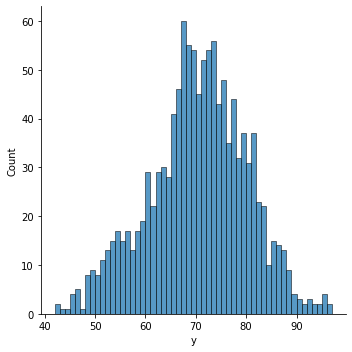

In [6]:
sns.displot(merged, x="y", binwidth=1)

In [7]:
merged["y"].describe()

count    1212.000000
mean       69.889439
std         9.720843
min        42.000000
25%        64.000000
50%        70.000000
75%        77.000000
max        97.000000
Name: y, dtype: float64

In [8]:
low = merged["y"].describe()["25%"]
mid = merged["y"].describe()["50%"]
high = merged["y"].describe()["75%"]

merged["class"] = 0
merged.loc[merged[merged["y"] > low].index, "class"] = 1
merged.loc[merged[merged["y"] > mid].index, "class"] = 2
merged.loc[merged[merged["y"] > high].index, "class"] = 3
merged


,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x824,x825,x826,x827,x828,x829,x830,x831,y,class
0,0,14168.823171,10514.380717,3316.149698,94230.695124,102.386606,92.677127,11108.748199,10866.505510,10837.622093,...,846.014651,105.132144,102.112809,2090.004260,2.691845,1234.374109,1000.784475,9285.751272,74.0,2
1,1,17757.037554,NaN,4101.016273,92959.527633,NaN,99.855168,10013.959449,10826.607494,10076.101597,...,776.084467,106.385590,103.472030,2474.051881,2.287976,NaN,1012.626705,11750.284764,51.0,0
2,2,14226.656663,11029.642499,NaN,124055.600561,100.542483,92.860892,NaN,10492.342868,NaN,...,737.040332,103.671234,109.458246,2656.083281,2.843706,888.353607,1048.810385,9553.922728,70.0,1
3,3,8766.012436,7384.202998,2147.308418,100157.719990,104.855061,101.929026,10050.049932,10499.521099,10525.030989,...,329.044233,105.084488,104.858546,1097.785204,2.732257,927.752967,1048.357330,NaN,52.0,0
4,4,13801.016418,13269.493652,3408.316953,92048.527786,103.759758,95.789235,9667.353978,10750.783106,10618.800750,...,NaN,NaN,100.369834,2693.053231,2.702908,1471.354073,1071.284484,9423.533063,85.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1207,18707.457475,13610.725702,3785.886941,113497.632841,109.526764,97.812339,11274.011935,10803.953566,10949.811419,...,1033.057071,104.838553,102.235191,3099.069091,3.079234,1362.889974,NaN,10110.360570,70.0,1
1208,1208,17108.239122,12168.536128,3442.619145,98218.773311,100.468476,109.994258,11031.326117,10231.743317,10687.321177,...,792.061138,105.823015,109.915094,3124.059793,2.935047,1577.404870,1026.749434,10620.330033,86.0,3
1209,1209,14264.707321,9273.405761,3580.894003,101668.927699,102.620705,104.470375,9159.594864,10661.827392,10623.176915,...,831.025190,101.926717,101.669153,2252.031870,NaN,1781.799720,1066.379647,10317.757445,68.0,1
1210,1210,14907.077440,10936.636575,3159.167789,100400.608972,106.622507,84.859872,10356.404262,10107.960852,10384.924460,...,852.001070,103.098317,104.397562,2585.048660,2.731768,1300.379678,1049.370040,10876.010268,71.0,2


/Users/kvu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

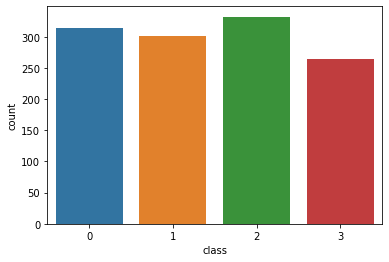

In [13]:
sns.countplot(merged["class"])

In [14]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

classes = merged["class"]
merged["fold"] = 0
for fold_id, (train_index, val_index) in enumerate(skf.split(merged, classes)):
    merged.loc[val_index, "fold"] = fold_id

merged

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x825,x826,x827,x828,x829,x830,x831,y,class,fold
0,0,14168.823171,10514.380717,3316.149698,94230.695124,102.386606,92.677127,11108.748199,10866.505510,10837.622093,...,105.132144,102.112809,2090.004260,2.691845,1234.374109,1000.784475,9285.751272,74.0,2,0
1,1,17757.037554,NaN,4101.016273,92959.527633,NaN,99.855168,10013.959449,10826.607494,10076.101597,...,106.385590,103.472030,2474.051881,2.287976,NaN,1012.626705,11750.284764,51.0,0,0
2,2,14226.656663,11029.642499,NaN,124055.600561,100.542483,92.860892,NaN,10492.342868,NaN,...,103.671234,109.458246,2656.083281,2.843706,888.353607,1048.810385,9553.922728,70.0,1,4
3,3,8766.012436,7384.202998,2147.308418,100157.719990,104.855061,101.929026,10050.049932,10499.521099,10525.030989,...,105.084488,104.858546,1097.785204,2.732257,927.752967,1048.357330,NaN,52.0,0,4
4,4,13801.016418,13269.493652,3408.316953,92048.527786,103.759758,95.789235,9667.353978,10750.783106,10618.800750,...,NaN,100.369834,2693.053231,2.702908,1471.354073,1071.284484,9423.533063,85.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1207,18707.457475,13610.725702,3785.886941,113497.632841,109.526764,97.812339,11274.011935,10803.953566,10949.811419,...,104.838553,102.235191,3099.069091,3.079234,1362.889974,NaN,10110.360570,70.0,1,3
1208,1208,17108.239122,12168.536128,3442.619145,98218.773311,100.468476,109.994258,11031.326117,10231.743317,10687.321177,...,105.823015,109.915094,3124.059793,2.935047,1577.404870,1026.749434,10620.330033,86.0,3,4
1209,1209,14264.707321,9273.405761,3580.894003,101668.927699,102.620705,104.470375,9159.594864,10661.827392,10623.176915,...,101.926717,101.669153,2252.031870,NaN,1781.799720,1066.379647,10317.757445,68.0,1,3
1210,1210,14907.077440,10936.636575,3159.167789,100400.608972,106.622507,84.859872,10356.404262,10107.960852,10384.924460,...,103.098317,104.397562,2585.048660,2.731768,1300.379678,1049.370040,10876.010268,71.0,2,1


In [14]:
merged = merged.sort_values(by=["fold"], ignore_index=True)

In [46]:
merged.to_csv("data/kfold.csv", index=False)